In [1]:
from lppls import lppls
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [2]:
# Download S&P 500 historical data
data = yf.download('^GSPC', start='2023-01-01', progress=False)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000


In [4]:
# convert time to ordinal
time = [pd.Timestamp.toordinal(t1) for t1 in data.index]

In [5]:
time[:10]

[738523,
 738524,
 738525,
 738526,
 738529,
 738530,
 738531,
 738532,
 738533,
 738537]

In [6]:
# create list of observation data
price = np.log(data['Adj Close'].values)

In [7]:
price[:10]

array([8.24908886, 8.25659955, 8.24488568, 8.26746952, 8.26670159,
       8.27365559, 8.28642316, 8.28983324, 8.29382214, 8.29178958])

In [8]:
# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [9]:
observations.shape

(2, 450)

In [10]:
# # set the max number for searches to perform before giving-up
# # the literature suggests 25
# MAX_SEARCHES = 5000

# # instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
# lppls_model = lppls.LPPLS(observations=observations)

In [11]:
# # fit the model to the data and get back the params
# tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_searches=MAX_SEARCHES)

In [12]:
from lppls import lppls_cmaes

In [19]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=2500, pop_size=4, factor_sigma=0.1)

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=260933, Thu Oct 17 10:33:38 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 3.472491381227007e-02 1.0e+00 1.06e+00  9e-02  2e+04 0:00.0
    2    320 3.313159533071434e-02 4.3e+00 1.22e+00  9e-02  1e+04 0:00.1
    3    480 3.271583261563162e-02 1.1e+01 1.50e+00  1e-01  7e+03 0:00.1
   39   6240 3.075881940507237e-02 6.7e+02 2.14e+00  3e-08  1e-04 0:01.9


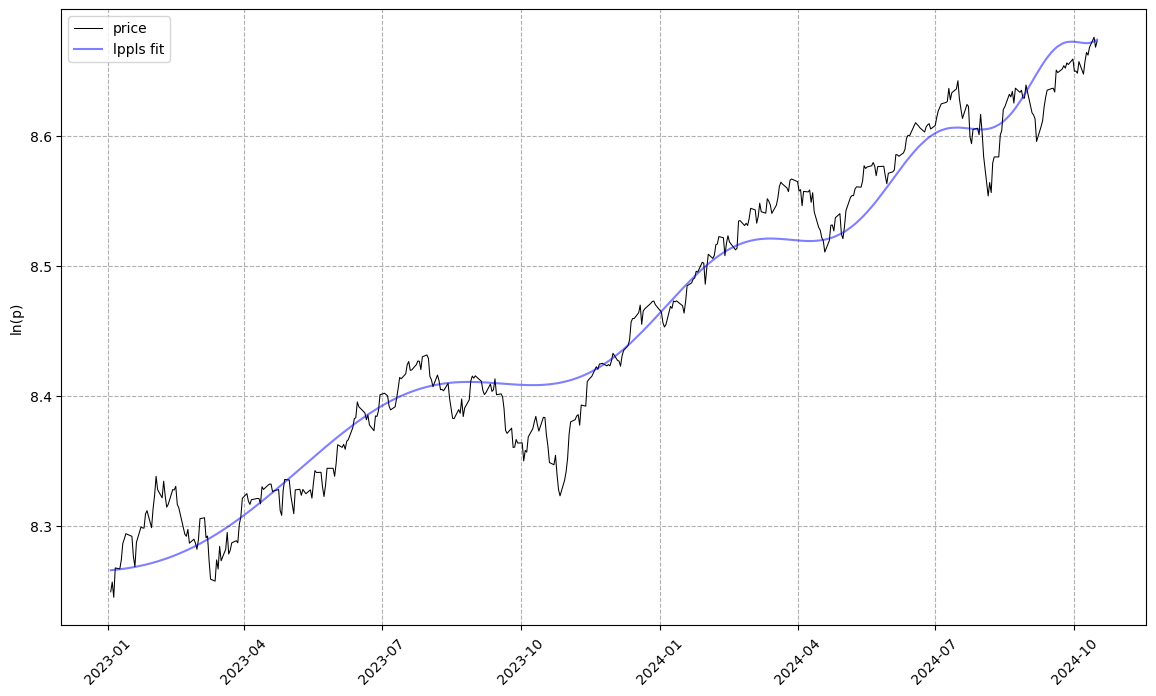

In [20]:
# visualize the fit
lppls_model.plot_fit()

In [21]:
pd.Timestamp.fromordinal(int(tc))

Timestamp('2025-01-29 00:00:00')